# Context

The goal of this analysis is to create a model to accurate predict if a customer is too risky to approve for a credit card. As well as developing a model, we will explore what features are most important when deciding whethe to extend a line of credit or not

# Data Definition

This data contains 20 different features. Below are the ones that have descriptions
* checking_status: Status of existing checking account
* duration: Duration in months
* credit_history: credits taken, paid back duly, delays, critical accounts
* purpose: Purpose of the credit
* credit_amount: Amount of credit
* savings_status: Status of savings account/bond
* employment: Present employment, in number of years
* installment_commitment: Installment rate in percentage of disposable income
* personal_status: sex and marital data
* other_parties: Other debtors / guarentors




# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv('credit_customers.csv')

df = data.copy()

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

* This data set has 1000 records, and no empty records. There are 7 numerical features and 14 objects



In [4]:
# Seperating data into X and y for easier analysis
X = df.drop('class', axis = 1)
y = df[['class']]


In [5]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [6]:
y

,class
0,good
1,bad
2,good
3,good
4,bad
...,...
995,good
996,good
997,good
998,bad


In [7]:
#splitting features into catagorical and numeric lists

cat_features = []

num_features = []

for feat in X.columns:
    print(X[feat].dtype)
    if X[feat].dtype == 'object':
        cat_features.append(feat)
    else:
        num_features.append(feat)

object
float64
object
object
float64
object
object
float64
object
object
float64
object
float64
object
object
float64
object
float64
object
object


In [8]:
print(num_features)


['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


In [9]:
print(cat_features)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


## Categorical Feature analysis - Univariate

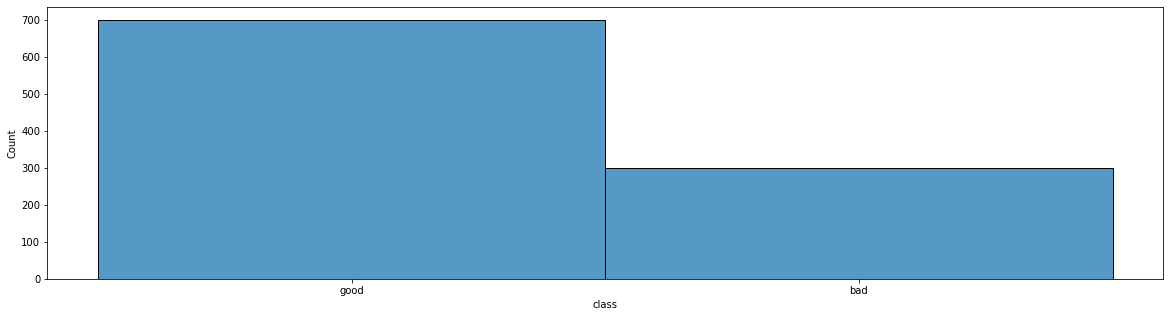

In [10]:
# Target variable

plt.figure(figsize=(20,5))
sns.histplot(y['class'])
plt.show()

*** Findings ***

70% of the customers were good credit customers and 30% were bad. 70% good is our baseline for the analysis

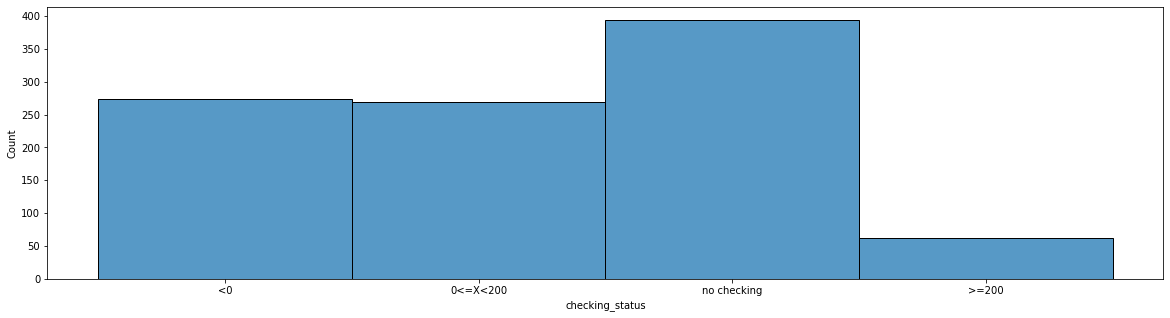

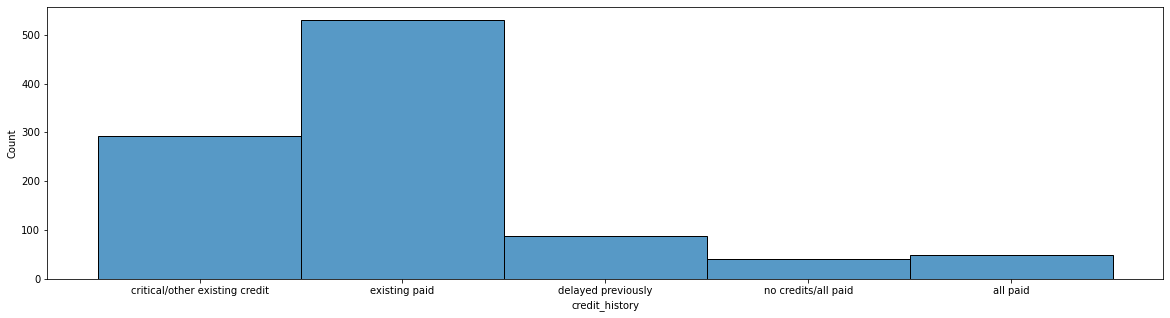

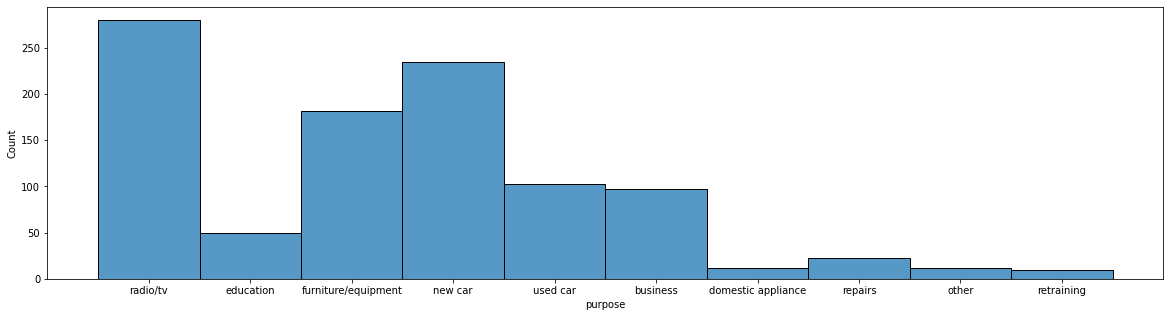

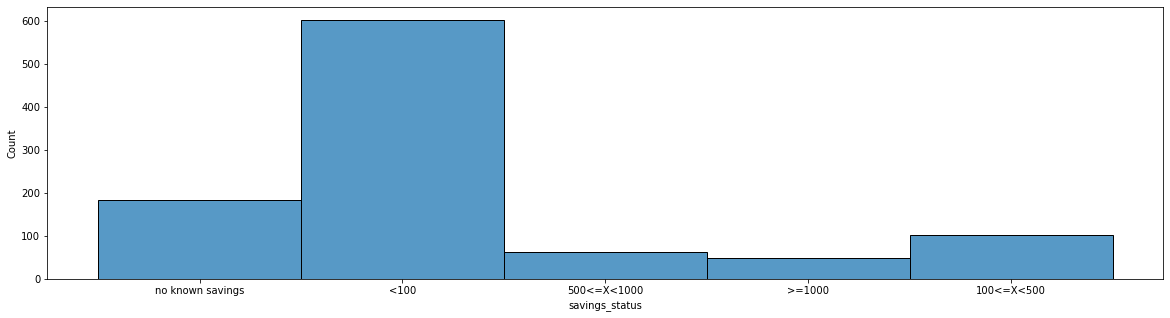

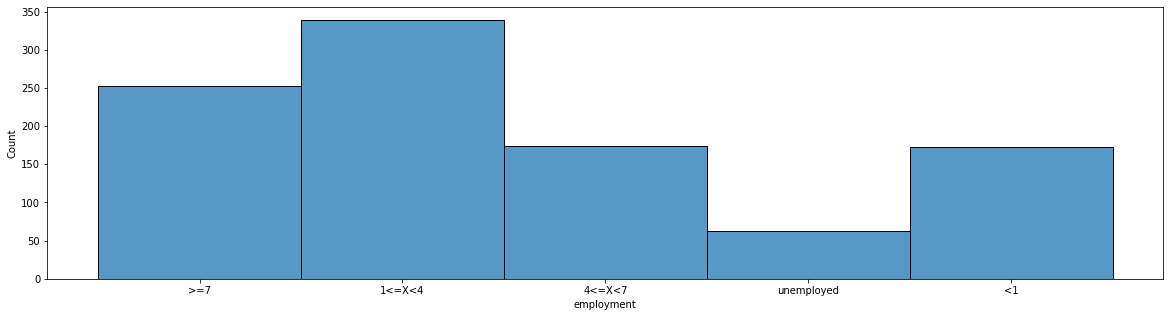

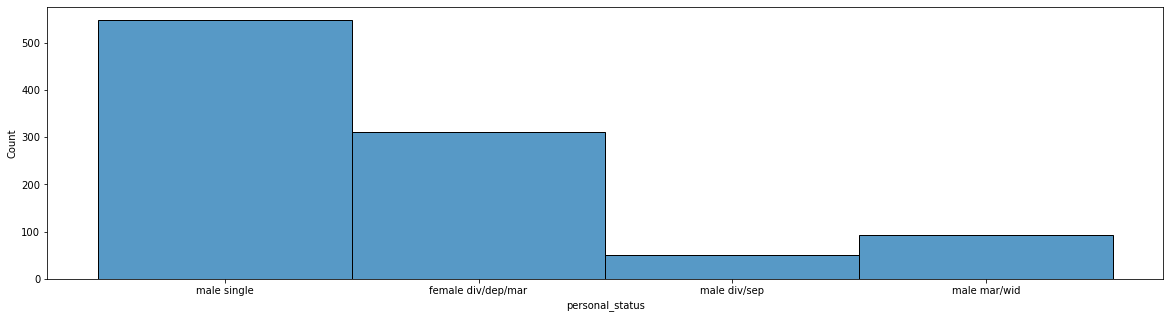

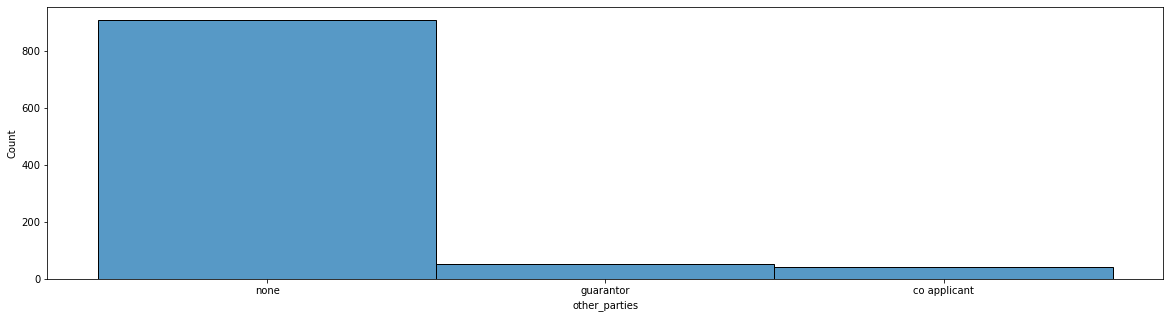

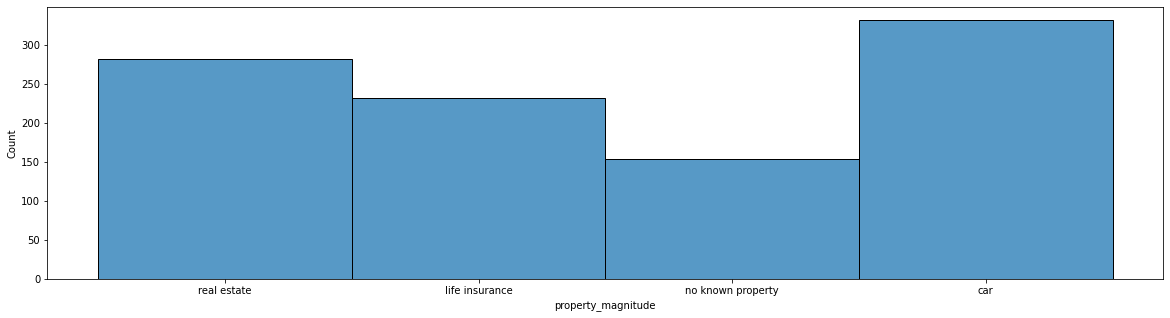

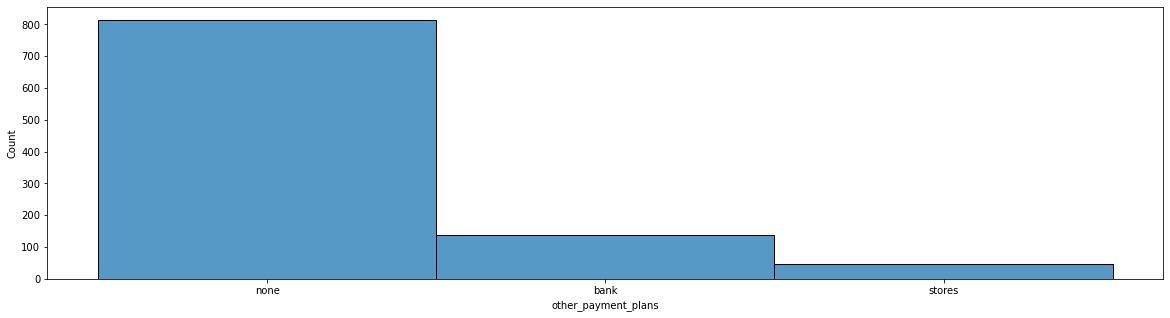

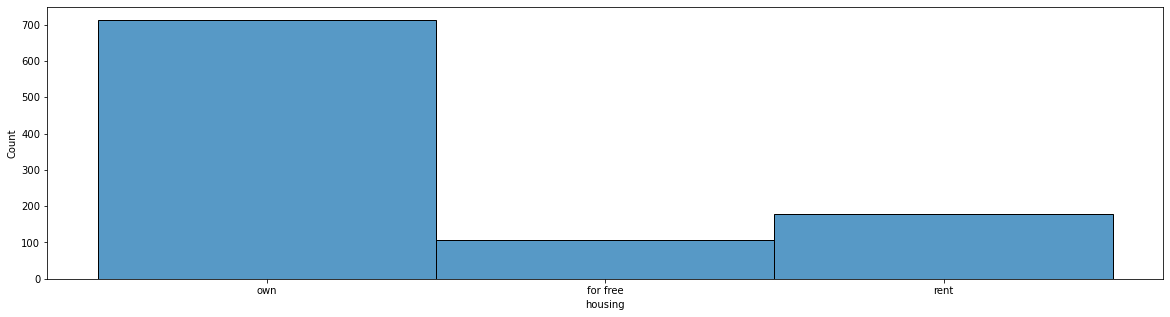

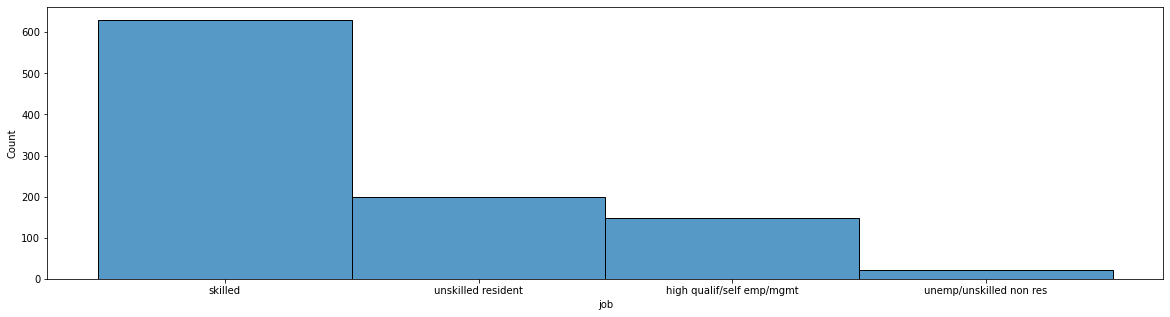

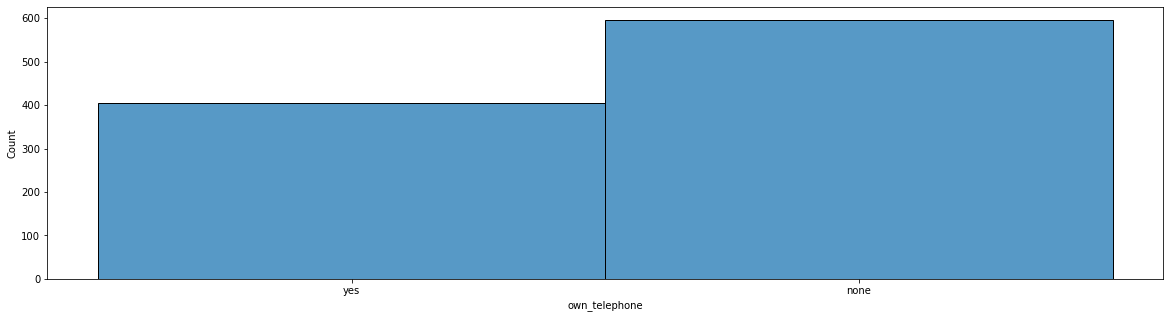

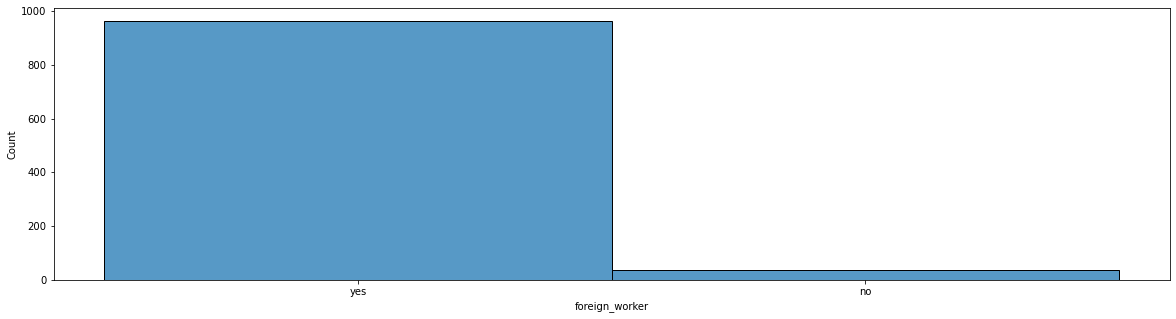

In [11]:
for cat in cat_features:
    plt.figure(figsize=(20,5))
    sns.histplot(X[cat])
    plt.show()

    

** Findings **

* Checking Status: Most customerrs have no checking, or their checking status is under 200

* Credit history: Based on the data it seems like most customers have existing credit and payed it, while, critical/other exisitinng, is the the next biggest category. no/credits/all paid, and all paid, may be candidates for combining into one category

* Purpose : customer are mainly getting credit cards for a new radio/tv, furniturre and cars

*  saving_status: most customerrs have less than 100 or no known savings

* employment status: Most of the customerrs have been employed between for more than 1 year at their current job

* personal Status: This may require some cleaning, as male is broken up into single vs div/sep or married, and female has all the categories except single in one bucket. May change this to gender depending on what it looks like when viewing the target variable with it

* Other parties: almost all none. May combine the two small buckets into one bucket

* Property magnitude: Mainly carrs, real estate, or life insurance

* other payment plans: mostlu none, may combine bank and stores into 'other'

* housing: most of the customers own their own house

* job: most are skilled labor

* own_telephone: over half have no phone

* foreign worker: The vast majority of the customers are foreign workers, which may explain some of their behaviors such as lack of phones




## Categorical Feature Analysis - Bivariate

Lets now understand how each of the categorical features interacts with the target variable (normalized by category, so eaach should = 100% when you add up good and bad)

<Figure size 1440x360 with 0 Axes>

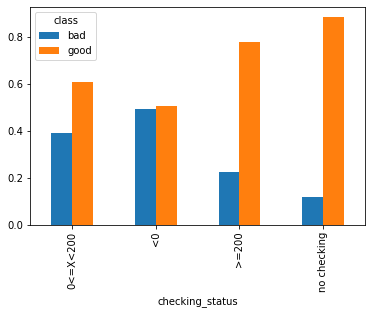

<Figure size 1440x360 with 0 Axes>

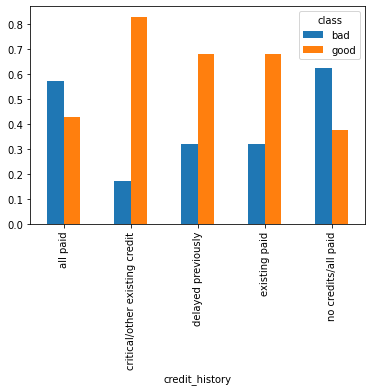

<Figure size 1440x360 with 0 Axes>

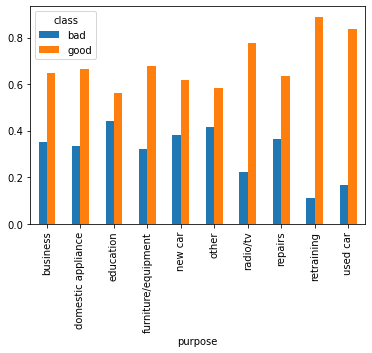

<Figure size 1440x360 with 0 Axes>

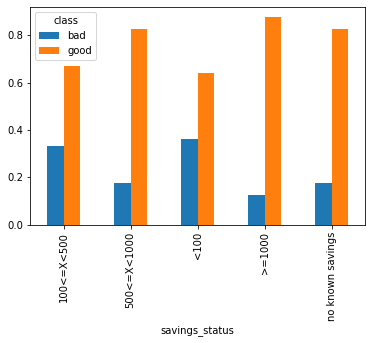

<Figure size 1440x360 with 0 Axes>

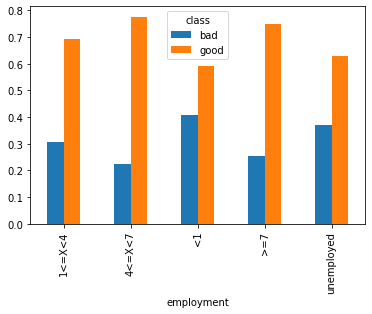

<Figure size 1440x360 with 0 Axes>

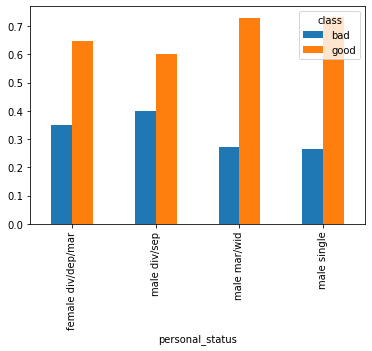

<Figure size 1440x360 with 0 Axes>

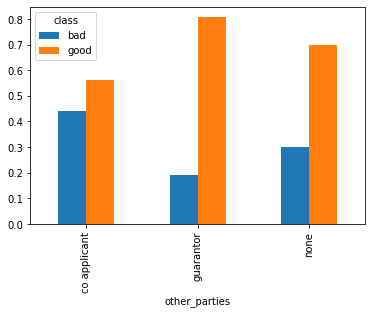

<Figure size 1440x360 with 0 Axes>

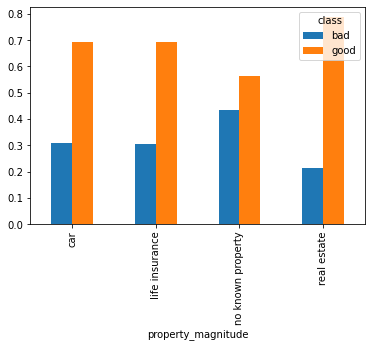

<Figure size 1440x360 with 0 Axes>

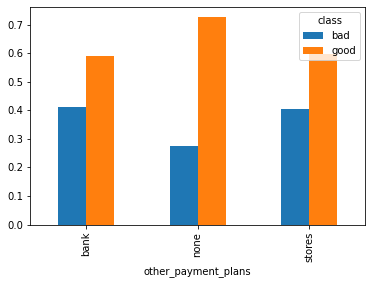

<Figure size 1440x360 with 0 Axes>

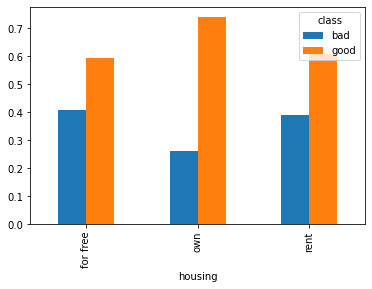

<Figure size 1440x360 with 0 Axes>

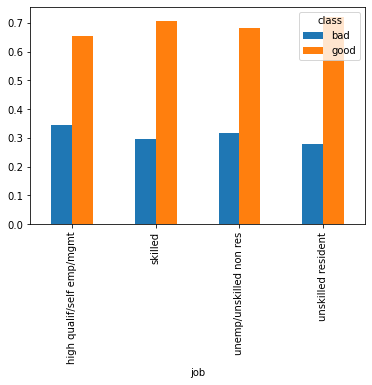

<Figure size 1440x360 with 0 Axes>

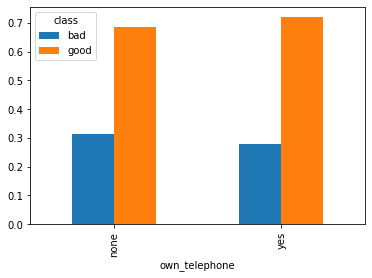

<Figure size 1440x360 with 0 Axes>

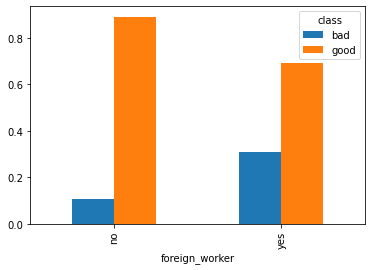

In [12]:
for cat in cat_features:
    plt.figure(figsize = (20,5))
    pd.crosstab(X[cat], y['class'], normalize= 'index').plot(kind='bar')
    plt.show()

## Findings

* Customers with no checking accounts tend to be good credit customers, however, those whose checking status is less than 200 tend to default

* Customers whose credit historry is all piad, , or no/credits/all paid, are much morre likely to default. May want to look into combineing those categories

* Customers whose credit purpose was education, new care, or other werre most likely to default, wherreas radio/tv, retraining, and used care had the highest likelihood of being good credit

* Customers whose saving status was less than 500 were more likely to be bad customers

* customers who had less than a year of employment, or were unemployed, tended to be poor customers

* females and divorced males have the highest rate of poor credit. However, this data is messy, since the female category has all statuses in it, will need to clean this to be just gender

* co applicants have the highest rate of bad credit

* Customers with no known property are a bigger risk

* Customers with store or bank as other payment plan are a higher risk. May want to combine bank and store, as they have thhe same risk as each other

* Cutsomers who have free housing or rent having higher risk. The risk is roughly the same for each, so may want to combine into own and not own

* For customers with the job high quality/self employed/ management, their risk is slighly higher

* Owning a telephone does not seem to have any impact on risk

* Being a foreign worker increase credit risk


## Numerical Feature Analysis - Univariate

Lets now analyze how the numerical categories are distributed 

In [13]:
X.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


** At a quick glance, none of the max values seem to be anything that would seem to be unreasonable. Lets now look at how those distributions look visually **

In [14]:
#build a function to display distibutions of numeric data

def show_hist_and_box_plots(df, feature):
    """
    Function to display histogram and boxplot of the distribution of values next to one another
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
    sns.histplot(df[feature], ax = ax1 )
    sns.boxplot(df[feature], ax= ax2)
    plt.show()

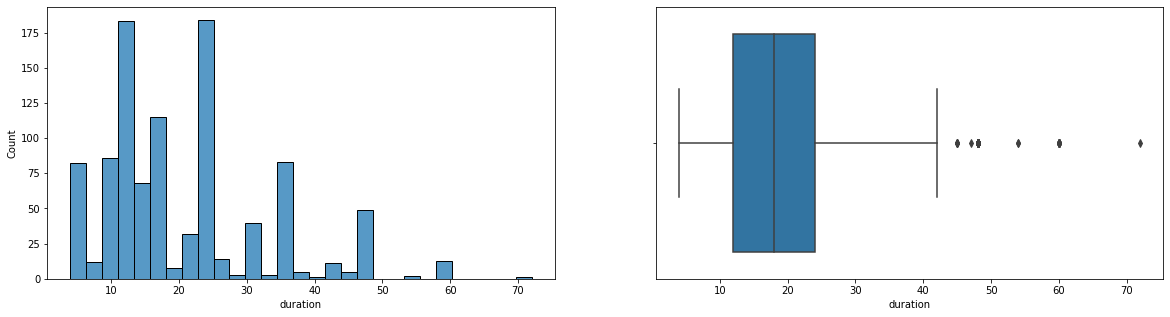

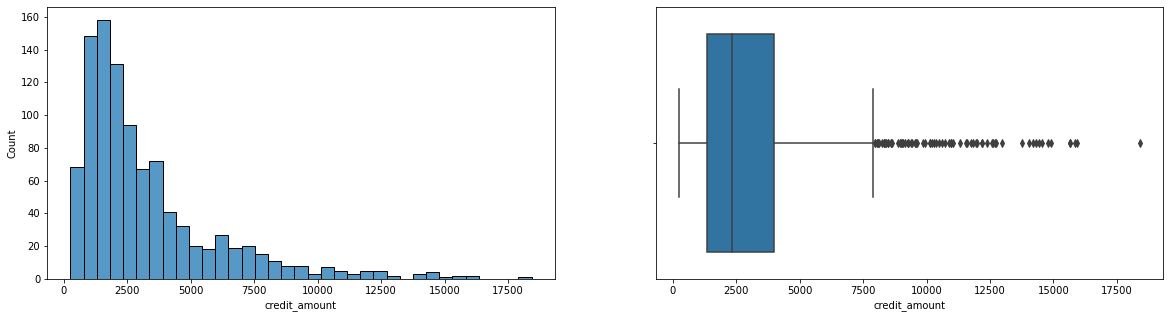

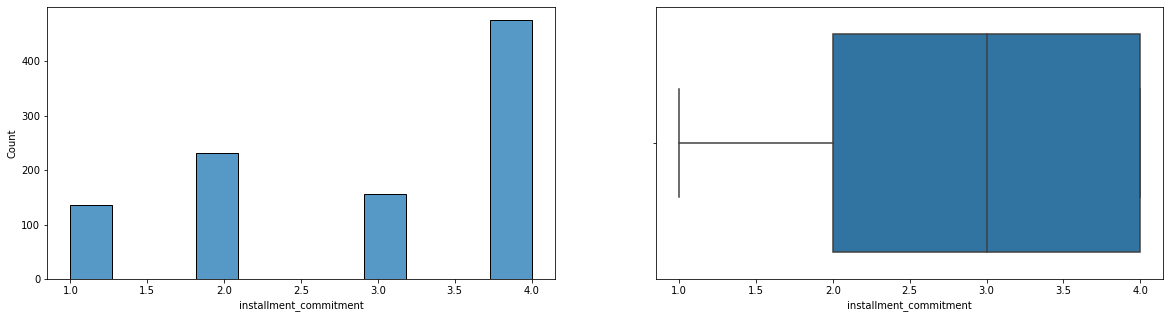

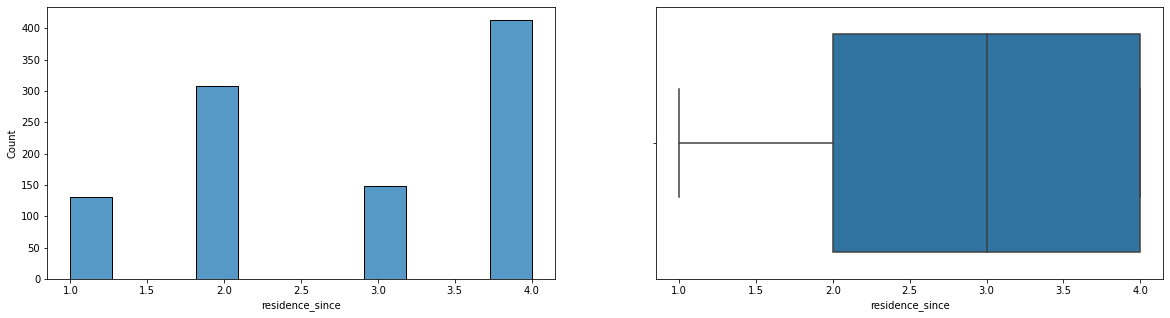

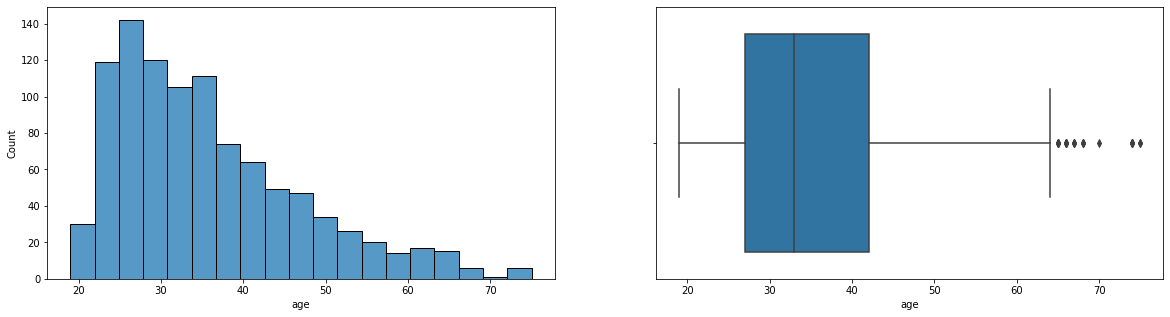

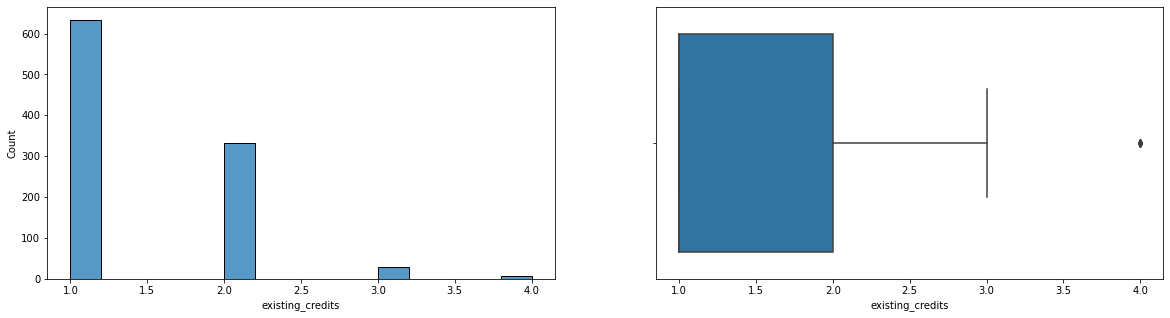

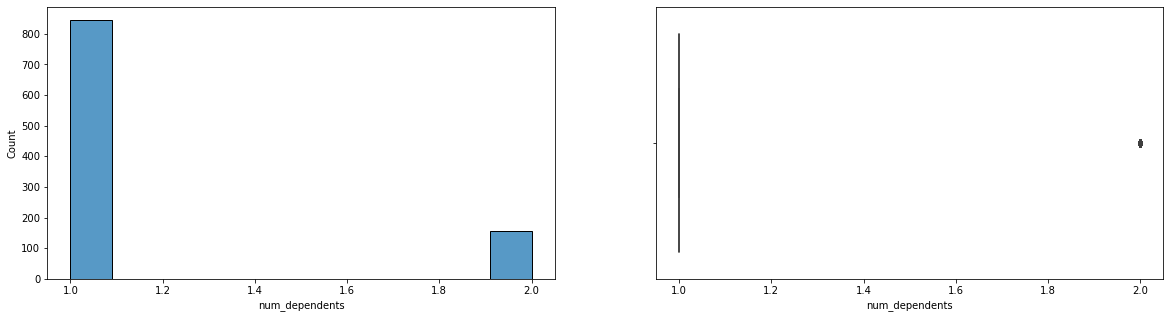

In [15]:
for feature in num_features:
    show_hist_and_box_plots(X,feature)

## Findings 

* Duration tends to be 18, but there are some outliers that skew the data rright. May want to cap outliers

* Credit amount is also skewed right and has a lot of outliers. may need to b capped, or use natural log

* no outliers with installment commitment

* No outliers with residence since

* Age is skewed right with outliers




## Numerical Features - Bivariate Analysis

Lets see how the features are related to the target, and how they correlate to one another

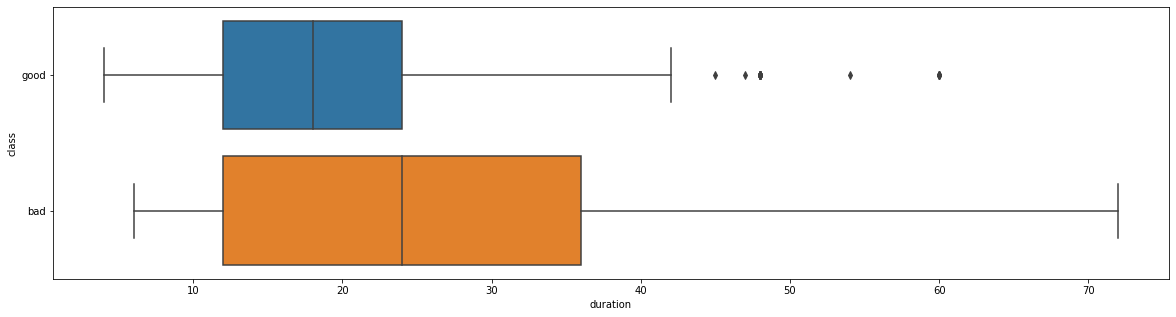

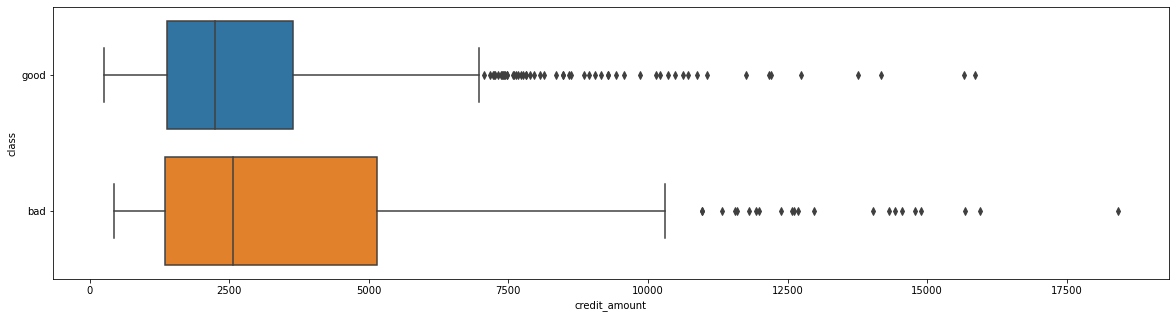

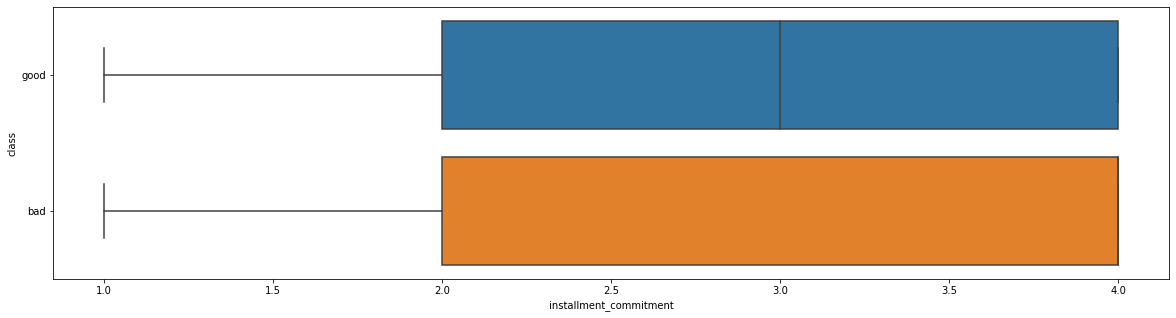

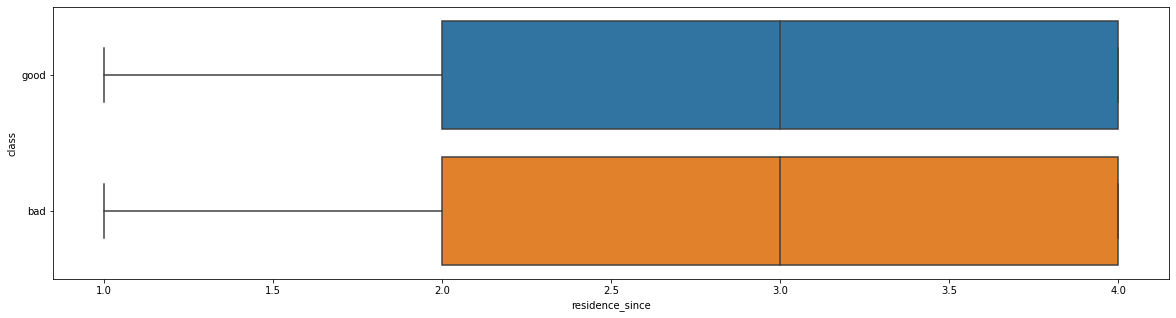

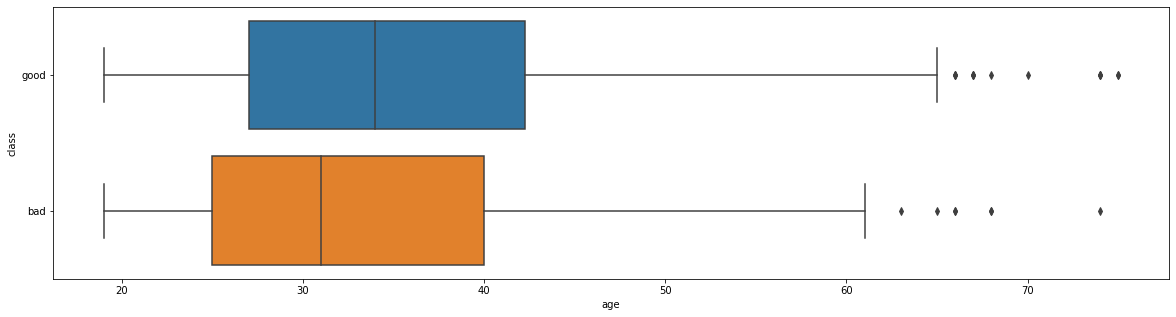

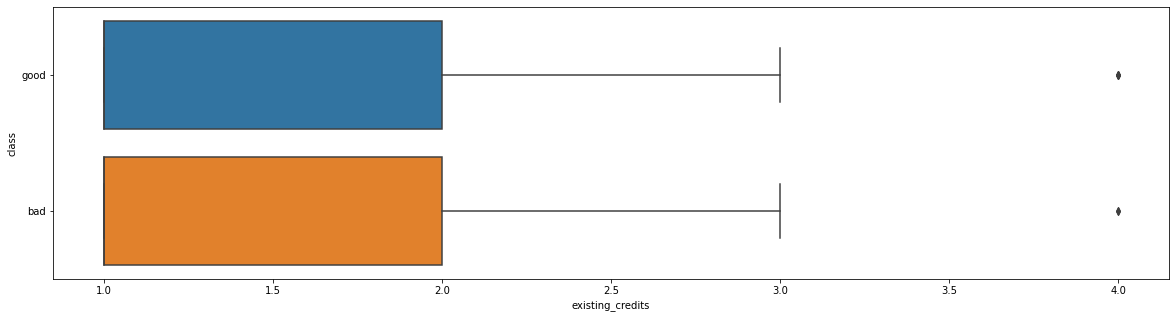

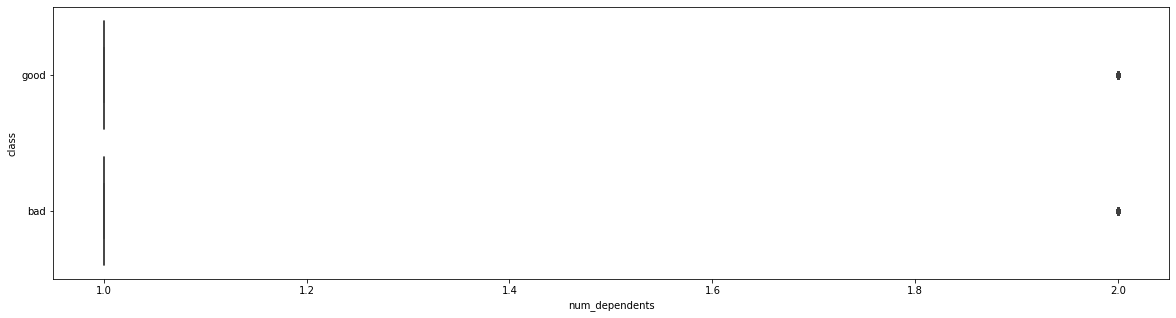

In [16]:
for num in num_features:
    plt.figure(figsize = (20,5))
    sns.boxplot(X[num], y['class'], )
    plt.show()


    

## Findings

* Bad credit customers tend to have a longer duration

* Bad credit customer stend to have a higher credit amount

* Bad credit customers tend to be younger

## Correlation

<AxesSubplot:>

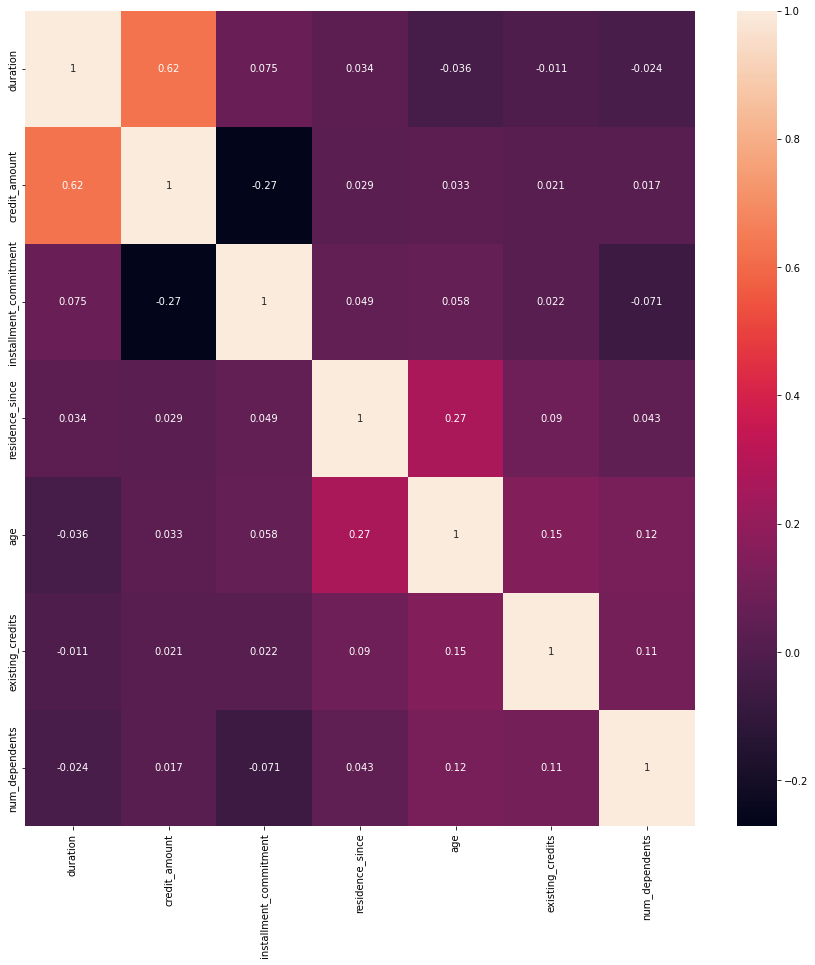

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot = True)

## Findings

The features are relatively independent of one another, however credit amount and duratio are highly correlated. This implies that some customers are running up their credit over time, making them bigger risks

Additionally, age and residence_since are correlated, as someone often lives somewhere longer as they age

# Exploratory Data Analysis - Top Findings

Based on the exploratory analysis of the catgerical and numerical features, here are my top findings thus far

* 70% of the data set has good credit, thus any are where there is less than 70% good (which means more than 30% bad), there is the potential that that feature helps predict default

* Features that need cleaning   
    * Other payment plans should have bank and stores combined into 'others'
    * checking status may need to be binned into over 200, under 200
    * credit history, combine the all paids?
    * Employment less than or greater than 1?
    
    
* Potential drivers of bad credit
    * Checking status less than 200 (should I just make this binary?, over or under 200)
    * credit histories of all paid, nocredits/all paid have extremely high rates of bad credit, this is the only category where you see over 50% having bad credit in some categories, so I hypothesize that this is the biggest categorical feature driving bad credit
    * Longer duration is associated with bad credit as it seems customers may run up credit over time
    
    
* Features with outliers
    * Duration
    * Credit amount
    * age
    
    
    
    
    



# Data Preprocessing





In [18]:
## Treating outlier by capping values at lower and upper whisker (1.5 IQR). Function below

def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5* IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [19]:
df_outliers_treated =  treat_outliers_all(X, num_features)

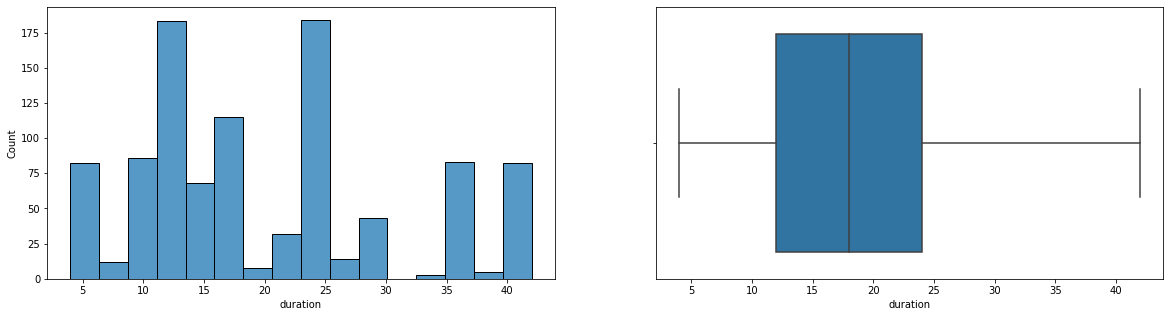

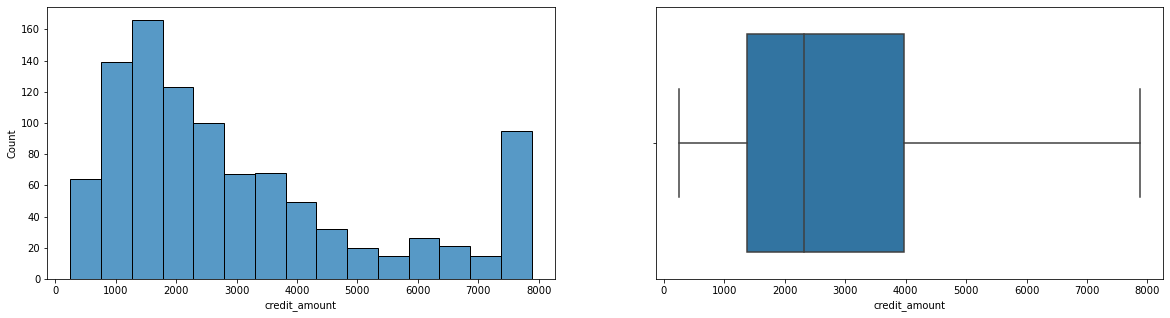

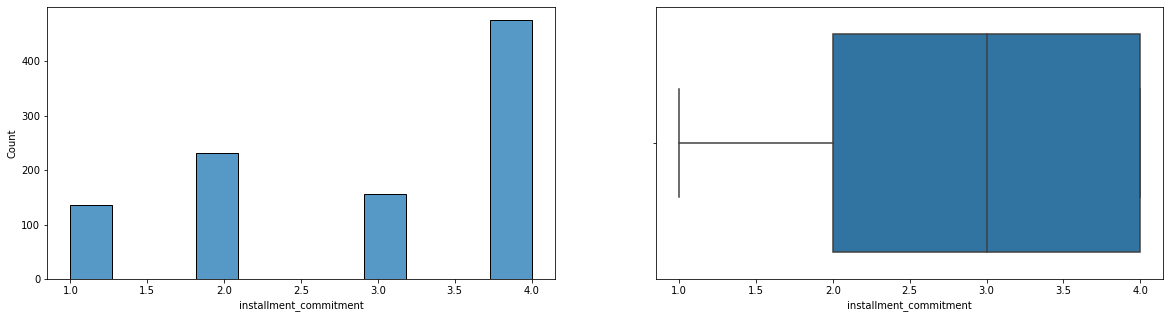

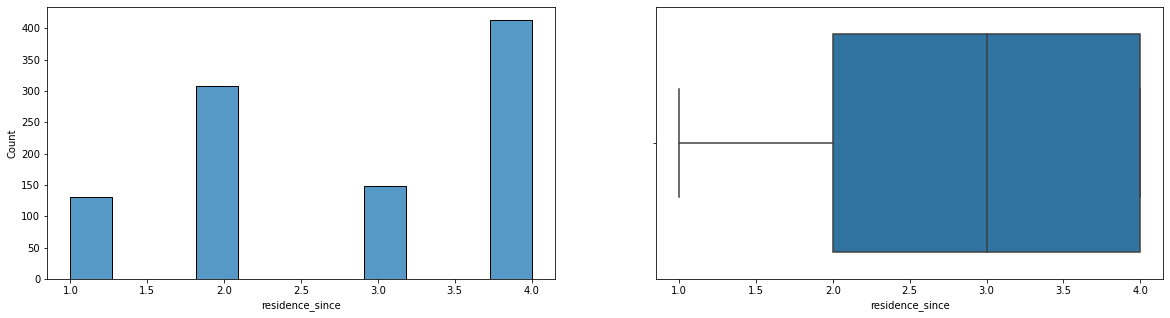

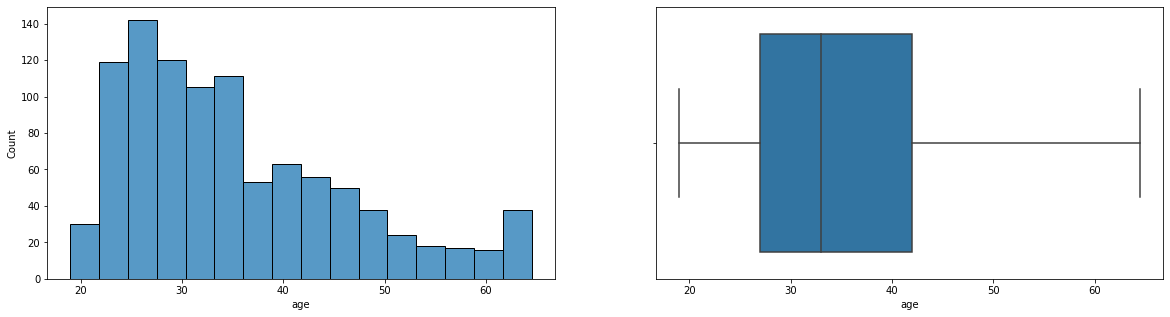

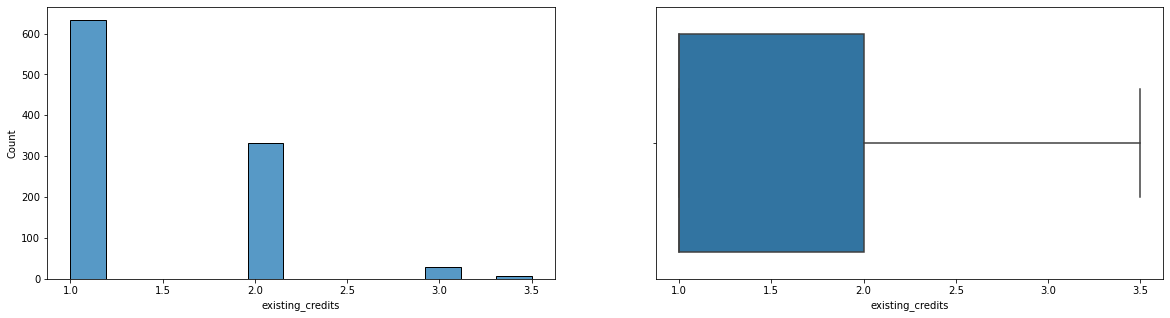

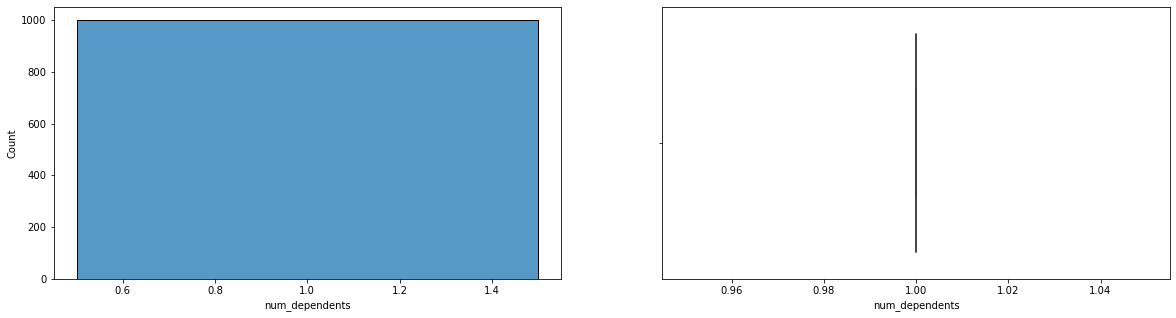

In [20]:
## checking to see if outliers are gone

for feature in num_features:
    show_hist_and_box_plots(df_outliers_treated,feature)

### Clean categorical data by combining some categories


In [21]:
## making copy

X_categories_combined = df_outliers_treated.copy()

In [22]:
def comparison_hist_and_bar_chart(df, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, )
    sns.histplot(df[feature], ax= ax1)
    pd.crosstab(df[feature], y['class'], normalize= 'index').plot(kind='bar', ax = ax2)
    plt.show()

In [23]:
credit_history = {
    'no credits/all paid': 'all paid',

}
    

X_categories_combined['credit_history'] = X_categories_combined['credit_history'].replace(credit_history)    

X_categories_combined['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
all paid                           89
delayed previously                 88
Name: credit_history, dtype: int64

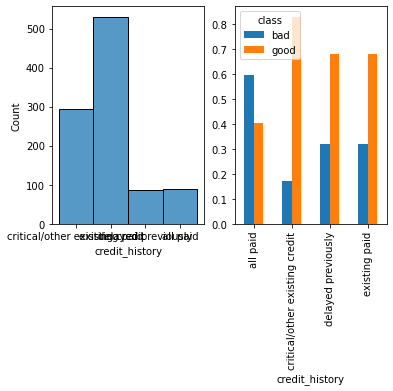

In [24]:
comparison_hist_and_bar_chart(X_categories_combined, 'credit_history')

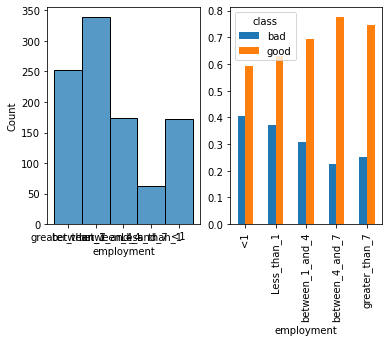

In [25]:
# there is an issue where XGboost doesnt understand feature names with the character '>' so removing those as well

employment = {
    'unemployed': 'Less_than_1',
    '1<=X<4': 'between_1_and_4',
    '4<=X<7': 'between_4_and_7',
    '>=7': 'greater_than_7'
    
}

X_categories_combined['employment'] = X_categories_combined['employment'].replace(employment)

comparison_hist_and_bar_chart(X_categories_combined, 'employment')

In [26]:
## Cleaning Other payment plans to combine bank and stores

other_payment = {
    "bank": 'other',
    'stores': 'other'
}

X_categories_combined['other_payment_plans'] = X_categories_combined['other_payment_plans'].replace(other_payment)

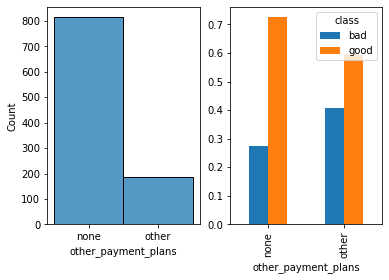

In [27]:
comparison_hist_and_bar_chart(X_categories_combined, 'other_payment_plans')

In [28]:
## Cleaning checking status

checking = {
    '0<=X<200': 'less_than_200',
    '<0': 'less_than_200',
    '>=200': 'greater_than_equal_200'
    
    
}

X_categories_combined['checking_status'] = X_categories_combined['checking_status'].replace(checking)

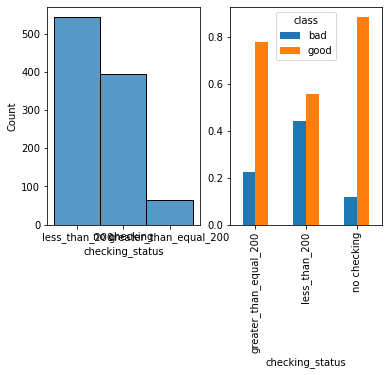

In [29]:
comparison_hist_and_bar_chart(X_categories_combined, 'checking_status')

In [30]:
# Cleaning saving status
saving = {
    '<100': 'less_than_100',
    '500<=X<1000': 'between_500_and_1000',
    '>=1000': 'greater_than_equal_1000',
    '100<=X<500': 'between_100_and_500'
    
    
}

X_categories_combined['savings_status'] = X_categories_combined['savings_status'].replace(saving)

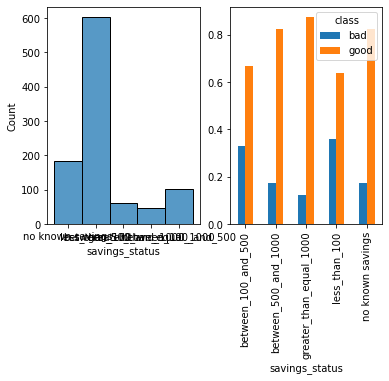

In [31]:
comparison_hist_and_bar_chart(X_categories_combined, 'savings_status')

# Preprosessing Data

Outliers have been capped, and categories have been cleaned up to work easier with ML models. Next I will split the data into training and testing, then standardize the numeric data using Standard Scaler and turn categorical data into numerical using One hot encoder

In [32]:
# Splitting data before preprocessing

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

np.random.seed(22)



In [33]:
## Use column transformer to do One hot encoding on al data before splitting

X_dummies = X_categories_combined.copy()

In [34]:

X_dummies = pd.get_dummies(X_dummies, columns = cat_features, drop_first = True)

In [35]:
X_dummies.shape


(1000, 45)

**We now have 44 columns form our original 22**

In [36]:
X_dummies.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'checking_status_less_than_200', 'checking_status_no checking',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'savings_status_between_500_and_1000',
       'savings_status_greater_than_equal_1000',
       'savings_status_less_than_100', 'savings_status_no known savings',
       'employment_Less_than_1', 'employment_between_1_and_4',
       'employment_between_4_and_7', 'employment_greater_than_7',
       'personal_status_male div/sep', 'personal_status_male mar/wid',
       'personal_status_male single', 'other_parties_guarantor',
       'ot

In [37]:
## changing Y from good/bad to 0/1 since we are trying to predict Bad

target = {
    'good': 0,
    'bad': 1
}

y['class'] = y['class'].replace(target)

y['class']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: class, Length: 1000, dtype: int64

In [38]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = .2, stratify = y['class'] )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 45), (200, 45), (800, 1), (200, 1))

In [39]:
## do standard scaling 

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train_scaled

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_less_than_200,checking_status_no checking,credit_history_critical/other existing credit,...,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_other,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,2.132905,2.285118,0.902058,1.035267,0.291988,2.835969,0.0,0.922958,-0.818625,-0.642983,...,2.368875,-0.639101,2.064742,-1.564697,-0.472484,0.772532,-0.147348,-0.498046,1.175139,0.204124
1,-1.044249,0.396009,-1.783971,1.035267,2.541509,-0.699325,0.0,-1.083473,1.221561,-0.642983,...,-0.422141,1.564697,-0.484322,0.639101,-0.472484,-1.294444,-0.147348,2.007846,-0.850963,0.204124
2,0.111080,-0.093715,-1.783971,-0.795039,-0.427859,-0.699325,0.0,-1.083473,1.221561,-0.642983,...,-0.422141,-0.639101,2.064742,0.639101,-0.472484,-1.294444,-0.147348,-0.498046,-0.850963,0.204124
3,-0.466584,-0.118901,0.902058,-0.795039,-0.067936,2.835969,0.0,0.922958,-0.818625,1.555250,...,-0.422141,1.564697,2.064742,0.639101,-0.472484,0.772532,-0.147348,-0.498046,1.175139,0.204124
4,-0.466584,0.094712,-0.888628,0.120114,-1.417648,-0.699325,0.0,-1.083473,1.221561,-0.642983,...,-0.422141,-0.639101,-0.484322,-1.564697,2.116472,0.772532,-0.147348,-0.498046,-0.850963,0.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.111080,-0.658063,0.902058,1.035267,0.022045,-0.699325,0.0,-1.083473,1.221561,-0.642983,...,-0.422141,1.564697,2.064742,0.639101,-0.472484,-1.294444,-0.147348,2.007846,-0.850963,0.204124
796,0.399912,-0.253691,0.902058,1.035267,-0.067936,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,-0.422141,1.564697,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,1.175139,0.204124
797,0.399912,1.011661,0.902058,-0.795039,-0.967744,-0.699325,0.0,-1.083473,-0.818625,-0.642983,...,-0.422141,-0.639101,2.064742,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124
798,-0.755416,-0.936040,0.902058,1.035267,-0.067936,1.068322,0.0,-1.083473,1.221561,1.555250,...,-0.422141,-0.639101,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124


In [40]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X_test_scaled

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_less_than_200,checking_status_no checking,credit_history_critical/other existing credit,...,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_other,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,0.399912,-0.260687,0.902058,1.035267,1.551720,1.068322,0.0,-1.083473,1.221561,1.555250,...,-0.422141,-0.639101,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124
1,2.132905,1.541962,-0.888628,-1.710192,-0.247897,1.068322,0.0,-1.083473,-0.818625,-0.642983,...,-0.422141,-0.639101,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124
2,1.555241,2.285118,-0.888628,1.035267,0.561930,1.068322,0.0,-1.083473,1.221561,1.555250,...,2.368875,-0.639101,-0.484322,-1.564697,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124
3,-0.755416,-0.793320,-0.888628,1.035267,-1.417648,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,-0.422141,-0.639101,-0.484322,-1.564697,2.116472,0.772532,-0.147348,-0.498046,-0.850963,0.204124
4,0.399912,0.295732,0.902058,1.035267,-1.417648,1.068322,0.0,-1.083473,-0.818625,1.555250,...,2.368875,-0.639101,-0.484322,-1.564697,2.116472,0.772532,-0.147348,-0.498046,-0.850963,0.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.755416,1.625449,-0.888628,-1.710192,1.461739,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,2.368875,-0.639101,-0.484322,0.639101,-0.472484,-1.294444,-0.147348,-0.498046,1.175139,0.204124
196,-0.755416,-0.776530,0.902058,1.035267,1.641701,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,-0.422141,1.564697,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,1.175139,0.204124
197,-0.755416,-0.189328,-0.888628,-1.710192,0.561930,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,-0.422141,-0.639101,-0.484322,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124
198,1.555241,-0.110506,0.902058,1.035267,-0.427859,-0.699325,0.0,0.922958,-0.818625,-0.642983,...,-0.422141,-0.639101,2.064742,0.639101,-0.472484,0.772532,-0.147348,-0.498046,-0.850963,0.204124


**Now that we have the scaled train and test sets, time for model building**

# Model Building

I will now use some of the more common classification models to see which ones initilly get the best scores. Since credit defaults are worse than denying someone credit who would otherwise be qualified, then recall may be more important than accuracy.I will investigate both metrics

In [41]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC


In [42]:
# create an object with model instances initialized so we can get quick data on model accuracy

models = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'XG Boost': XGBClassifier(),
    'XGB Random Forest': XGBRFClassifier(),
    'SVC': SVC(),
    'Linear SVC': LinearSVC(),
    'NuSVC': NuSVC()    
    
}



In [43]:
y_train['class']

927    1
629    0
418    0
138    0
420    0
      ..
592    0
862    1
477    0
803    0
600    0
Name: class, Length: 800, dtype: int64

In [44]:

    model_results = []
    
    for name, model in models.items():
        print(name, model)
        model.fit(X_train_scaled, y_train['class'])
        
        y_train_preds = model.predict(X_train_scaled)
        
        y_test_preds = model.predict(X_test_scaled)

        train_accuracy = model.score(X_train_scaled, y_train['class'])
        test_accuracy = model.score(X_test_scaled, y_test['class'])

        results = [name, train_accuracy, test_accuracy ]
        print(results)
        model_results.append(results)
        
        
        


Logistic Regression LogisticRegression()
['Logistic Regression', 0.78, 0.76]
K Nearest Neighbors KNeighborsClassifier()
['K Nearest Neighbors', 0.80125, 0.695]
Decision Tree DecisionTreeClassifier()
['Decision Tree', 1.0, 0.73]
Random Forest RandomForestClassifier()
['Random Forest', 1.0, 0.78]
AdaBoost AdaBoostClassifier()
['AdaBoost', 0.79375, 0.78]
Gradient Boost GradientBoostingClassifier()
['Gradient Boost', 0.9025, 0.79]
XG Boost XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_

In [45]:
model_results

[['Logistic Regression', 0.78, 0.76],
 ['K Nearest Neighbors', 0.80125, 0.695],
 ['Decision Tree', 1.0, 0.73],
 ['Random Forest', 1.0, 0.78],
 ['AdaBoost', 0.79375, 0.78],
 ['Gradient Boost', 0.9025, 0.79],
 ['XG Boost', 1.0, 0.755],
 ['XGB Random Forest', 0.8725, 0.745],
 ['SVC', 0.8775, 0.785],
 ['Linear SVC', 0.78125, 0.77],
 ['NuSVC', 0.93, 0.77]]

In [46]:
model_results = pd.DataFrame(model_results, columns=['Model Name', 'Training Accuracy', 'Testing Accuracy'])

In [47]:
model_results.sort_values('Testing Accuracy', ascending=False)

,Model Name,Training Accuracy,Testing Accuracy
5,Gradient Boost,0.90250,0.790
8,SVC,0.87750,0.785
3,Random Forest,1.00000,0.780
4,AdaBoost,0.79375,0.780
9,Linear SVC,0.78125,0.770
10,NuSVC,0.93000,0.770
0,Logistic Regression,0.78000,0.760
6,XG Boost,1.00000,0.755
7,XGB Random Forest,0.87250,0.745
2,Decision Tree,1.00000,0.730



*Since Graident boost, svc, random forest, and ada boost are the top performing models one the testing data, I will now attempt to tune the models further to see if performance can be approved on accuracy, as well as looking into how they perform on recall*

In [48]:
# create function to do fit, classification report, confusion matrix for Training and testing

def model_performance(model):
    model.fit(X_train_scaled, y_train)
    y_preds_train = model.predict(X_train_scaled)
    y_preds_test = model.predict(X_test_scaled)
    
    print('Training Results')
    print(classification_report(y_train, y_preds_train))
    
    
    print('Test Results')
    print(classification_report(y_test, y_preds_test))
       
    ConfusionMatrixDisplay.from_predictions(y_train, y_preds_train)
    

    ConfusionMatrixDisplay.from_predictions(y_test, y_preds_test)
    

[10:55:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       240

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Results
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       140
           1       0.59      0.58      0.59        60

    accuracy                           0.76       200
   macro avg       0.71      0.71      0.71       200
weighted av

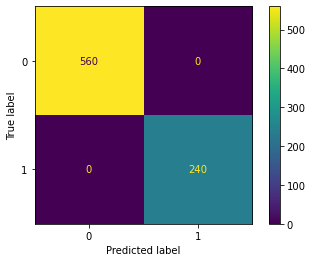

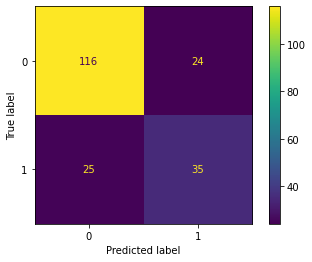

In [49]:
xgboost_untuned = XGBClassifier()

model_performance(xgboost_untuned)

#remember predict proba and auc curve


**Model is 100% accurate and has perfect recall when ran on the training set, while that drops to 76% accuracy and 58% recall when trying to predict bad (1) loans. This is clearly overfitting the training set. Lets do some preliminary tuning using Randomssearch CV to see if we can identify some improvements**

In [59]:
### Will now use randomized search CV to get an idea of what ideal hyper parameters could be

gradient_grid = {
    'min_samples_split': np.arange(0, 100, 5),
    'min_samples_leaf': np.arange(0, 100, 5),
    'max_depth': np.arange(2,20, 1),
    'max_features': np.arange(1,20, 1),
    'learning_rate': np.arange(0.01, 1, 0.05),
    'n_estimators': np.arange(50, 1000, 100),
    'subsample':np.arange(.1, 1, .1)    
    

}

In [87]:
tuned_gradient_boost = GradientBoostingClassifier(random_state=22)

rscv_gradient = RandomizedSearchCV(tuned_gradient_boost, 
                                   param_distributions=gradient_grid,
                                  
                                   
                                   n_iter=200, 
                                                                      
                                   verbose = 3)

In [88]:
rscv_gradient.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END learning_rate=0.01, max_depth=13, max_features=9, min_samples_leaf=25, min_samples_split=70, n_estimators=650, subsample=0.4;, score=0.744 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=13, max_features=9, min_samples_leaf=25, min_samples_split=70, n_estimators=650, subsample=0.4;, score=0.738 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=13, max_features=9, min_samples_leaf=25, min_samples_split=70, n_estimators=650, subsample=0.4;, score=0.750 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=13, max_features=9, min_samples_leaf=25, min_samples_split=70, n_estimators=650, subsample=0.4;, score=0.725 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=13, max_features=9, min_samples_leaf=25, min_samples_split=70, n_estimators=650, subsample=0.4;, score=0.744 total time=   0.4s
[CV 1/5] END learning_rate=0.26, max_depth=2, max_features=10, min_samples_leaf=4

[CV 2/5] END learning_rate=0.51, max_depth=15, max_features=17, min_samples_leaf=85, min_samples_split=40, n_estimators=550, subsample=0.30000000000000004;, score=0.706 total time=   0.2s
[CV 3/5] END learning_rate=0.51, max_depth=15, max_features=17, min_samples_leaf=85, min_samples_split=40, n_estimators=550, subsample=0.30000000000000004;, score=0.694 total time=   0.2s
[CV 4/5] END learning_rate=0.51, max_depth=15, max_features=17, min_samples_leaf=85, min_samples_split=40, n_estimators=550, subsample=0.30000000000000004;, score=0.688 total time=   0.2s
[CV 5/5] END learning_rate=0.51, max_depth=15, max_features=17, min_samples_leaf=85, min_samples_split=40, n_estimators=550, subsample=0.30000000000000004;, score=0.669 total time=   0.2s
[CV 1/5] END learning_rate=0.66, max_depth=14, max_features=13, min_samples_leaf=25, min_samples_split=45, n_estimators=50, subsample=0.8;, score=0.738 total time=   0.1s
[CV 2/5] END learning_rate=0.66, max_depth=14, max_features=13, min_samples_l

[CV 3/5] END learning_rate=0.8600000000000001, max_depth=15, max_features=16, min_samples_leaf=90, min_samples_split=50, n_estimators=550, subsample=0.6;, score=0.744 total time=   0.3s
[CV 4/5] END learning_rate=0.8600000000000001, max_depth=15, max_features=16, min_samples_leaf=90, min_samples_split=50, n_estimators=550, subsample=0.6;, score=0.681 total time=   0.3s
[CV 5/5] END learning_rate=0.8600000000000001, max_depth=15, max_features=16, min_samples_leaf=90, min_samples_split=50, n_estimators=550, subsample=0.6;, score=0.731 total time=   0.3s
[CV 1/5] END learning_rate=0.31000000000000005, max_depth=15, max_features=6, min_samples_leaf=90, min_samples_split=80, n_estimators=850, subsample=0.1;, score=0.700 total time=   0.3s
[CV 2/5] END learning_rate=0.31000000000000005, max_depth=15, max_features=6, min_samples_leaf=90, min_samples_split=80, n_estimators=850, subsample=0.1;, score=0.700 total time=   0.3s
[CV 3/5] END learning_rate=0.31000000000000005, max_depth=15, max_feat

[CV 4/5] END learning_rate=0.16000000000000003, max_depth=15, max_features=1, min_samples_leaf=45, min_samples_split=20, n_estimators=150, subsample=0.30000000000000004;, score=0.719 total time=   0.1s
[CV 5/5] END learning_rate=0.16000000000000003, max_depth=15, max_features=1, min_samples_leaf=45, min_samples_split=20, n_estimators=150, subsample=0.30000000000000004;, score=0.725 total time=   0.1s
[CV 1/5] END learning_rate=0.26, max_depth=15, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=150, subsample=0.4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.26, max_depth=15, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=150, subsample=0.4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.26, max_depth=15, max_features=5, min_samples_leaf=0, min_samples_split=0, n_estimators=150, subsample=0.4;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.26, max_depth=15, max_features=5, min_samples_leaf=0, min_samples_

[CV 5/5] END learning_rate=0.91, max_depth=2, max_features=17, min_samples_leaf=75, min_samples_split=5, n_estimators=250, subsample=0.4;, score=0.700 total time=   0.1s
[CV 1/5] END learning_rate=0.46, max_depth=10, max_features=10, min_samples_leaf=95, min_samples_split=30, n_estimators=550, subsample=0.4;, score=0.762 total time=   0.3s
[CV 2/5] END learning_rate=0.46, max_depth=10, max_features=10, min_samples_leaf=95, min_samples_split=30, n_estimators=550, subsample=0.4;, score=0.688 total time=   0.2s
[CV 3/5] END learning_rate=0.46, max_depth=10, max_features=10, min_samples_leaf=95, min_samples_split=30, n_estimators=550, subsample=0.4;, score=0.694 total time=   0.3s
[CV 4/5] END learning_rate=0.46, max_depth=10, max_features=10, min_samples_leaf=95, min_samples_split=30, n_estimators=550, subsample=0.4;, score=0.656 total time=   0.3s
[CV 5/5] END learning_rate=0.46, max_depth=10, max_features=10, min_samples_leaf=95, min_samples_split=30, n_estimators=550, subsample=0.4;, s

[CV 3/5] END learning_rate=0.21000000000000002, max_depth=16, max_features=4, min_samples_leaf=55, min_samples_split=25, n_estimators=150, subsample=0.30000000000000004;, score=0.762 total time=   0.1s
[CV 4/5] END learning_rate=0.21000000000000002, max_depth=16, max_features=4, min_samples_leaf=55, min_samples_split=25, n_estimators=150, subsample=0.30000000000000004;, score=0.694 total time=   0.1s
[CV 5/5] END learning_rate=0.21000000000000002, max_depth=16, max_features=4, min_samples_leaf=55, min_samples_split=25, n_estimators=150, subsample=0.30000000000000004;, score=0.719 total time=   0.1s
[CV 1/5] END learning_rate=0.6100000000000001, max_depth=4, max_features=3, min_samples_leaf=30, min_samples_split=90, n_estimators=450, subsample=0.2;, score=0.706 total time=   0.2s
[CV 2/5] END learning_rate=0.6100000000000001, max_depth=4, max_features=3, min_samples_leaf=30, min_samples_split=90, n_estimators=450, subsample=0.2;, score=0.662 total time=   0.2s
[CV 3/5] END learning_rate

[CV 3/5] END learning_rate=0.060000000000000005, max_depth=16, max_features=6, min_samples_leaf=20, min_samples_split=20, n_estimators=950, subsample=0.4;, score=0.750 total time=   0.7s
[CV 4/5] END learning_rate=0.060000000000000005, max_depth=16, max_features=6, min_samples_leaf=20, min_samples_split=20, n_estimators=950, subsample=0.4;, score=0.681 total time=   0.9s
[CV 5/5] END learning_rate=0.060000000000000005, max_depth=16, max_features=6, min_samples_leaf=20, min_samples_split=20, n_estimators=950, subsample=0.4;, score=0.756 total time=   0.7s
[CV 1/5] END learning_rate=0.7100000000000001, max_depth=17, max_features=16, min_samples_leaf=60, min_samples_split=90, n_estimators=350, subsample=0.4;, score=0.700 total time=   0.3s
[CV 2/5] END learning_rate=0.7100000000000001, max_depth=17, max_features=16, min_samples_leaf=60, min_samples_split=90, n_estimators=350, subsample=0.4;, score=0.650 total time=   0.2s
[CV 3/5] END learning_rate=0.7100000000000001, max_depth=17, max_fe

[CV 3/5] END learning_rate=0.9600000000000001, max_depth=11, max_features=9, min_samples_leaf=45, min_samples_split=95, n_estimators=750, subsample=0.5;, score=0.706 total time=   0.4s
[CV 4/5] END learning_rate=0.9600000000000001, max_depth=11, max_features=9, min_samples_leaf=45, min_samples_split=95, n_estimators=750, subsample=0.5;, score=0.681 total time=   0.4s
[CV 5/5] END learning_rate=0.9600000000000001, max_depth=11, max_features=9, min_samples_leaf=45, min_samples_split=95, n_estimators=750, subsample=0.5;, score=0.725 total time=   0.4s
[CV 1/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples_leaf=95, min_samples_split=45, n_estimators=350, subsample=0.30000000000000004;, score=0.725 total time=   0.1s
[CV 2/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples_leaf=95, min_samples_split=45, n_estimators=350, subsample=0.30000000000000004;, score=0.688 total time=   0.1s
[CV 3/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples

[CV 2/5] END learning_rate=0.6100000000000001, max_depth=7, max_features=8, min_samples_leaf=50, min_samples_split=60, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 3/5] END learning_rate=0.6100000000000001, max_depth=7, max_features=8, min_samples_leaf=50, min_samples_split=60, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 4/5] END learning_rate=0.6100000000000001, max_depth=7, max_features=8, min_samples_leaf=50, min_samples_split=60, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 5/5] END learning_rate=0.6100000000000001, max_depth=7, max_features=8, min_samples_leaf=50, min_samples_split=60, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 1/5] END learning_rate=0.66, max_depth=13, max_features=12, min_samples_leaf=25, min_samples_split=30, n_estimators=850, subsample=0.6;, score=0.688 total time=   0.7s
[CV 2/5] END learning_rate=0.66, max_depth=13, max_features=12, min_samples_leaf=25, min_sam

[CV 2/5] END learning_rate=0.46, max_depth=19, max_features=16, min_samples_leaf=25, min_samples_split=85, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.2s
[CV 3/5] END learning_rate=0.46, max_depth=19, max_features=16, min_samples_leaf=25, min_samples_split=85, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 4/5] END learning_rate=0.46, max_depth=19, max_features=16, min_samples_leaf=25, min_samples_split=85, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 5/5] END learning_rate=0.46, max_depth=19, max_features=16, min_samples_leaf=25, min_samples_split=85, n_estimators=350, subsample=0.1;, score=0.700 total time=   0.1s
[CV 1/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=16, min_samples_leaf=0, min_samples_split=85, n_estimators=750, subsample=0.6;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=16, min_samples_leaf=0, min_samples_split=85, n_estimat

[CV 3/5] END learning_rate=0.66, max_depth=12, max_features=12, min_samples_leaf=45, min_samples_split=60, n_estimators=850, subsample=0.30000000000000004;, score=0.681 total time=   0.4s
[CV 4/5] END learning_rate=0.66, max_depth=12, max_features=12, min_samples_leaf=45, min_samples_split=60, n_estimators=850, subsample=0.30000000000000004;, score=0.662 total time=   0.4s
[CV 5/5] END learning_rate=0.66, max_depth=12, max_features=12, min_samples_leaf=45, min_samples_split=60, n_estimators=850, subsample=0.30000000000000004;, score=0.656 total time=   0.4s
[CV 1/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples_leaf=0, min_samples_split=45, n_estimators=250, subsample=0.4;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples_leaf=0, min_samples_split=45, n_estimators=250, subsample=0.4;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.51, max_depth=7, max_features=8, min_samples_leaf=0, min_samples_split=45

[CV 5/5] END learning_rate=0.56, max_depth=16, max_features=19, min_samples_leaf=80, min_samples_split=60, n_estimators=950, subsample=0.6;, score=0.694 total time=   0.5s
[CV 1/5] END learning_rate=0.76, max_depth=14, max_features=18, min_samples_leaf=20, min_samples_split=15, n_estimators=750, subsample=0.4;, score=0.613 total time=   0.5s
[CV 2/5] END learning_rate=0.76, max_depth=14, max_features=18, min_samples_leaf=20, min_samples_split=15, n_estimators=750, subsample=0.4;, score=0.725 total time=   0.5s
[CV 3/5] END learning_rate=0.76, max_depth=14, max_features=18, min_samples_leaf=20, min_samples_split=15, n_estimators=750, subsample=0.4;, score=0.594 total time=   0.5s
[CV 4/5] END learning_rate=0.76, max_depth=14, max_features=18, min_samples_leaf=20, min_samples_split=15, n_estimators=750, subsample=0.4;, score=0.644 total time=   0.5s
[CV 5/5] END learning_rate=0.76, max_depth=14, max_features=18, min_samples_leaf=20, min_samples_split=15, n_estimators=750, subsample=0.4;,

[CV 1/5] END learning_rate=0.81, max_depth=4, max_features=18, min_samples_leaf=70, min_samples_split=70, n_estimators=250, subsample=0.7000000000000001;, score=0.650 total time=   0.2s
[CV 2/5] END learning_rate=0.81, max_depth=4, max_features=18, min_samples_leaf=70, min_samples_split=70, n_estimators=250, subsample=0.7000000000000001;, score=0.650 total time=   0.2s
[CV 3/5] END learning_rate=0.81, max_depth=4, max_features=18, min_samples_leaf=70, min_samples_split=70, n_estimators=250, subsample=0.7000000000000001;, score=0.713 total time=   0.2s
[CV 4/5] END learning_rate=0.81, max_depth=4, max_features=18, min_samples_leaf=70, min_samples_split=70, n_estimators=250, subsample=0.7000000000000001;, score=0.662 total time=   0.2s
[CV 5/5] END learning_rate=0.81, max_depth=4, max_features=18, min_samples_leaf=70, min_samples_split=70, n_estimators=250, subsample=0.7000000000000001;, score=0.694 total time=   0.2s
[CV 1/5] END learning_rate=0.41000000000000003, max_depth=18, max_feat

[CV 4/5] END learning_rate=0.9600000000000001, max_depth=11, max_features=7, min_samples_leaf=45, min_samples_split=65, n_estimators=150, subsample=0.7000000000000001;, score=0.688 total time=   0.1s
[CV 5/5] END learning_rate=0.9600000000000001, max_depth=11, max_features=7, min_samples_leaf=45, min_samples_split=65, n_estimators=150, subsample=0.7000000000000001;, score=0.713 total time=   0.1s
[CV 1/5] END learning_rate=0.060000000000000005, max_depth=7, max_features=13, min_samples_leaf=80, min_samples_split=50, n_estimators=550, subsample=0.4;, score=0.744 total time=   0.2s
[CV 2/5] END learning_rate=0.060000000000000005, max_depth=7, max_features=13, min_samples_leaf=80, min_samples_split=50, n_estimators=550, subsample=0.4;, score=0.700 total time=   0.2s
[CV 3/5] END learning_rate=0.060000000000000005, max_depth=7, max_features=13, min_samples_leaf=80, min_samples_split=50, n_estimators=550, subsample=0.4;, score=0.731 total time=   0.2s
[CV 4/5] END learning_rate=0.0600000000

[CV 4/5] END learning_rate=0.6100000000000001, max_depth=9, max_features=18, min_samples_leaf=85, min_samples_split=5, n_estimators=650, subsample=0.6;, score=0.744 total time=   0.4s
[CV 5/5] END learning_rate=0.6100000000000001, max_depth=9, max_features=18, min_samples_leaf=85, min_samples_split=5, n_estimators=650, subsample=0.6;, score=0.713 total time=   0.4s
[CV 1/5] END learning_rate=0.56, max_depth=16, max_features=5, min_samples_leaf=10, min_samples_split=40, n_estimators=950, subsample=0.6;, score=0.706 total time=   0.6s
[CV 2/5] END learning_rate=0.56, max_depth=16, max_features=5, min_samples_leaf=10, min_samples_split=40, n_estimators=950, subsample=0.6;, score=0.706 total time=   0.6s
[CV 3/5] END learning_rate=0.56, max_depth=16, max_features=5, min_samples_leaf=10, min_samples_split=40, n_estimators=950, subsample=0.6;, score=0.725 total time=   0.7s
[CV 4/5] END learning_rate=0.56, max_depth=16, max_features=5, min_samples_leaf=10, min_samples_split=40, n_estimators=

[CV 5/5] END learning_rate=0.81, max_depth=18, max_features=10, min_samples_leaf=60, min_samples_split=95, n_estimators=550, subsample=0.9;, score=0.731 total time=   0.4s
[CV 1/5] END learning_rate=0.11, max_depth=15, max_features=13, min_samples_leaf=90, min_samples_split=0, n_estimators=50, subsample=0.7000000000000001;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.11, max_depth=15, max_features=13, min_samples_leaf=90, min_samples_split=0, n_estimators=50, subsample=0.7000000000000001;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.11, max_depth=15, max_features=13, min_samples_leaf=90, min_samples_split=0, n_estimators=50, subsample=0.7000000000000001;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.11, max_depth=15, max_features=13, min_samples_leaf=90, min_samples_split=0, n_estimators=50, subsample=0.7000000000000001;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.11, max_depth=15, max_features=13, min_samples_leaf=90, min_samples

[CV 5/5] END learning_rate=0.9600000000000001, max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=15, n_estimators=350, subsample=0.8;, score=0.756 total time=   0.3s
[CV 1/5] END learning_rate=0.31000000000000005, max_depth=3, max_features=3, min_samples_leaf=40, min_samples_split=80, n_estimators=250, subsample=0.2;, score=0.719 total time=   0.1s
[CV 2/5] END learning_rate=0.31000000000000005, max_depth=3, max_features=3, min_samples_leaf=40, min_samples_split=80, n_estimators=250, subsample=0.2;, score=0.706 total time=   0.1s
[CV 3/5] END learning_rate=0.31000000000000005, max_depth=3, max_features=3, min_samples_leaf=40, min_samples_split=80, n_estimators=250, subsample=0.2;, score=0.725 total time=   0.1s
[CV 4/5] END learning_rate=0.31000000000000005, max_depth=3, max_features=3, min_samples_leaf=40, min_samples_split=80, n_estimators=250, subsample=0.2;, score=0.706 total time=   0.1s
[CV 5/5] END learning_rate=0.31000000000000005, max_depth=3, max_features=3,

[CV 1/5] END learning_rate=0.31000000000000005, max_depth=19, max_features=4, min_samples_leaf=75, min_samples_split=25, n_estimators=50, subsample=0.8;, score=0.738 total time=   0.0s
[CV 2/5] END learning_rate=0.31000000000000005, max_depth=19, max_features=4, min_samples_leaf=75, min_samples_split=25, n_estimators=50, subsample=0.8;, score=0.725 total time=   0.0s
[CV 3/5] END learning_rate=0.31000000000000005, max_depth=19, max_features=4, min_samples_leaf=75, min_samples_split=25, n_estimators=50, subsample=0.8;, score=0.725 total time=   0.0s
[CV 4/5] END learning_rate=0.31000000000000005, max_depth=19, max_features=4, min_samples_leaf=75, min_samples_split=25, n_estimators=50, subsample=0.8;, score=0.738 total time=   0.0s
[CV 5/5] END learning_rate=0.31000000000000005, max_depth=19, max_features=4, min_samples_leaf=75, min_samples_split=25, n_estimators=50, subsample=0.8;, score=0.756 total time=   0.0s
[CV 1/5] END learning_rate=0.060000000000000005, max_depth=5, max_features=

[CV 2/5] END learning_rate=0.16000000000000003, max_depth=7, max_features=10, min_samples_leaf=40, min_samples_split=35, n_estimators=150, subsample=0.9;, score=0.700 total time=   0.2s
[CV 3/5] END learning_rate=0.16000000000000003, max_depth=7, max_features=10, min_samples_leaf=40, min_samples_split=35, n_estimators=150, subsample=0.9;, score=0.744 total time=   0.1s
[CV 4/5] END learning_rate=0.16000000000000003, max_depth=7, max_features=10, min_samples_leaf=40, min_samples_split=35, n_estimators=150, subsample=0.9;, score=0.694 total time=   0.1s
[CV 5/5] END learning_rate=0.16000000000000003, max_depth=7, max_features=10, min_samples_leaf=40, min_samples_split=35, n_estimators=150, subsample=0.9;, score=0.744 total time=   0.1s
[CV 1/5] END learning_rate=0.46, max_depth=4, max_features=14, min_samples_leaf=85, min_samples_split=90, n_estimators=50, subsample=0.4;, score=0.762 total time=   0.0s
[CV 2/5] END learning_rate=0.46, max_depth=4, max_features=14, min_samples_leaf=85, mi

[CV 1/5] END learning_rate=0.91, max_depth=10, max_features=11, min_samples_leaf=30, min_samples_split=70, n_estimators=850, subsample=0.6;, score=0.681 total time=   0.6s
[CV 2/5] END learning_rate=0.91, max_depth=10, max_features=11, min_samples_leaf=30, min_samples_split=70, n_estimators=850, subsample=0.6;, score=0.662 total time=   0.6s
[CV 3/5] END learning_rate=0.91, max_depth=10, max_features=11, min_samples_leaf=30, min_samples_split=70, n_estimators=850, subsample=0.6;, score=0.750 total time=   0.6s
[CV 4/5] END learning_rate=0.91, max_depth=10, max_features=11, min_samples_leaf=30, min_samples_split=70, n_estimators=850, subsample=0.6;, score=0.738 total time=   0.6s
[CV 5/5] END learning_rate=0.91, max_depth=10, max_features=11, min_samples_leaf=30, min_samples_split=70, n_estimators=850, subsample=0.6;, score=0.731 total time=   0.6s
[CV 1/5] END learning_rate=0.6100000000000001, max_depth=3, max_features=1, min_samples_leaf=5, min_samples_split=65, n_estimators=550, subs

[CV 1/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=7, min_samples_leaf=50, min_samples_split=15, n_estimators=550, subsample=0.4;, score=0.694 total time=   0.3s
[CV 2/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=7, min_samples_leaf=50, min_samples_split=15, n_estimators=550, subsample=0.4;, score=0.725 total time=   0.3s
[CV 3/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=7, min_samples_leaf=50, min_samples_split=15, n_estimators=550, subsample=0.4;, score=0.719 total time=   0.3s
[CV 4/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=7, min_samples_leaf=50, min_samples_split=15, n_estimators=550, subsample=0.4;, score=0.656 total time=   0.3s
[CV 5/5] END learning_rate=0.9600000000000001, max_depth=19, max_features=7, min_samples_leaf=50, min_samples_split=15, n_estimators=550, subsample=0.4;, score=0.694 total time=   0.3s
[CV 1/5] END learning_rate=0.51, max_depth=9, max_features=1, min_samples_l

[CV 2/5] END learning_rate=0.51, max_depth=2, max_features=5, min_samples_leaf=50, min_samples_split=40, n_estimators=950, subsample=0.4;, score=0.700 total time=   0.4s
[CV 3/5] END learning_rate=0.51, max_depth=2, max_features=5, min_samples_leaf=50, min_samples_split=40, n_estimators=950, subsample=0.4;, score=0.713 total time=   0.4s
[CV 4/5] END learning_rate=0.51, max_depth=2, max_features=5, min_samples_leaf=50, min_samples_split=40, n_estimators=950, subsample=0.4;, score=0.681 total time=   0.4s
[CV 5/5] END learning_rate=0.51, max_depth=2, max_features=5, min_samples_leaf=50, min_samples_split=40, n_estimators=950, subsample=0.4;, score=0.662 total time=   0.4s
[CV 1/5] END learning_rate=0.26, max_depth=5, max_features=10, min_samples_leaf=80, min_samples_split=70, n_estimators=750, subsample=0.2;, score=0.700 total time=   0.2s
[CV 2/5] END learning_rate=0.26, max_depth=5, max_features=10, min_samples_leaf=80, min_samples_split=70, n_estimators=750, subsample=0.2;, score=0.7

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=22),
                   n_iter=200,
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95]),
                                        'min_samples_split': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95]),
                                        'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 75

In [89]:
rscv_gradient.best_params_

{'subsample': 0.5,
 'n_estimators': 250,
 'min_samples_split': 35,
 'min_samples_leaf': 55,
 'max_features': 1,
 'max_depth': 18,
 'learning_rate': 0.36000000000000004}

**Above are the best parameters based on running randomsearch, lets see how it performs**

Training Results
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       560
           1       0.65      0.53      0.58       240

    accuracy                           0.77       800
   macro avg       0.73      0.70      0.71       800
weighted avg       0.76      0.77      0.76       800

Test Results
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       140
           1       0.66      0.62      0.64        60

    accuracy                           0.79       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.79      0.79      0.79       200



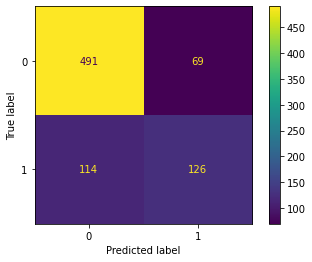

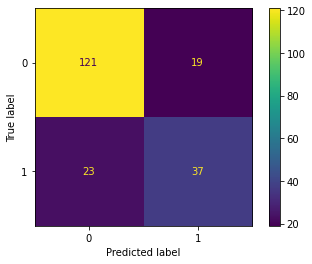

In [91]:
gradient_tuned = GradientBoostingClassifier(random_state=22, 
                                            subsample=0.5, 
                                            n_estimators=250, 
                                            min_samples_split=35, 
                                            min_samples_leaf=55, 
                                            max_features=1,
                                            max_depth= 18,
                                            learning_rate= 0.360000000000000005
                                           )

model_performance(gradient_tuned)

**Model is no longer overfitting the training data. Randomized seach cv has improved accuracy to 80% on test data, but recall is still around 62%. The data is good at predicting Good loans (0), but not bad loans. Lets see if we can use ROC and predict probability to get recll up.**